# Cálculo del número Pi por un método MonteCarlo

Si lanzamos un par de números aleatorios, $x$ y $y$, cuya densidad de probabilidad es uniforme en el segmento del plano XY definido por $[0,1)x[0,1)$. ¿Cúal será la probabilidad de que este punto $(x,y)$ se encuentre a una distancia menor o igual que $1$ del punto $(0,0)$? ¿Qué número irracional encontraremos como el cuadruple de dicha probabilidad?

## Tarea

Dada una secuencia de $N$ pares de números aleatorios ($x$,$y$) donde $0<=x<1$ y $0<=y<1$, calcula la probabilidad que tuvo cualquiera de sus puntos ($x$,$y$) de encontrarse a una distancia menor o igual que $1$. Esa probabilidad será el número de puntos $q$ que cumplen esa condición dividido $N$:

\begin{equation}
P= \frac{q}{N}
\end{equation}

Veamos como generar con Numpy por ejemplo 100 puntos ($x$,$y$) en el espacio bidimensional definido por $[0,1)x[0,1)$:

In [1]:
import numpy as np

puntos = np.random.rand(10000,2)

¿Podrías representar gráficamente con ayuda de la librería MatPlotLib estos puntos en el espacio?
¿Sabrías representar en color rojo los puntos que se encuentran a una distancia menor que 1 del punto (0,0) y en azul el resto?

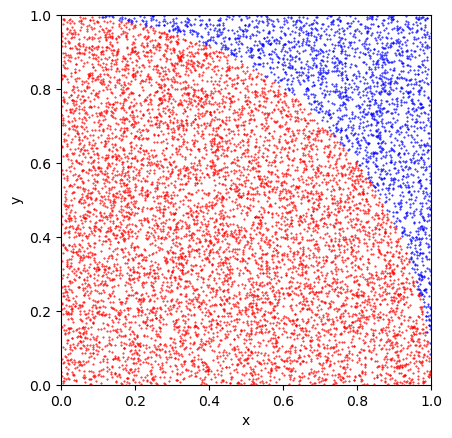

In [2]:
from matplotlib import pyplot as plt

dentro=[]
fuera=[]

for x,y in puntos:
    if (x**2+y**2)<=1.0:
        dentro.append([x,y])
    else:
        fuera.append([x,y])

dentro=np.array(dentro)
fuera=np.array(fuera)

plt.scatter(dentro[:,0], dentro[:,1], c='r', s=0.2)
plt.scatter(fuera[:,0], fuera[:,1], c='b', s=0.2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
ax = plt.gca()
ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Habrás visto que los puntos rojos se encuentran en una zona de área igual a un cuarto de un círculo de radio 1.
Podrás entonces calcular la probabilidad teórica de que un punto cumpla la condición de estar a una distancia menor o igual que 1 del punto (0,0) como el área del cuarto de círculo de radio 1 dividido por el área del cuadrado de lado 1:

\begin{equation}
P= \frac{\pi}{4}
\end{equation}

De esta manera podemos calcular $\pi$ de la probabilidad de que un punto aleatorio se encuentre a una distancia menor o igual que 1 de (0,0):

\begin{equation}
\pi= 4\cdot \frac{q}{N}
\end{equation}

¿Qué valor de $\pi$ obtienes con 100 números aleatorios?

In [3]:
N=100
puntos = np.random.rand(N,2)

q=0
for x,y in puntos:
    if (x**2+y**2)<=1.0:
        q+=1

print(f'El valor de pi obtenido con 100 números aleatorios es: {4*q/N}')

El valor de pi obtenido con 100 números aleatorios es: 2.92


Por último, representa gráficamente el valor que obtienes de $\pi$ frente a $N$ cuando $N$ toma valores entre 1 y un número suficientemente largo como para observar la convergencia del valor calculado de $4\cdot \frac{q}{N}$ al número irracional que conocemos como $\pi$:

In [4]:
N=20000
puntos = np.random.rand(N,2)

pi_list = []
N_list = []

ii=1
q=0
for x,y in puntos:
    if (x**2+y**2)<=1.0:
        q+=1
    pi_list.append(4*q/ii)
    N_list.append(ii)
    ii+=1

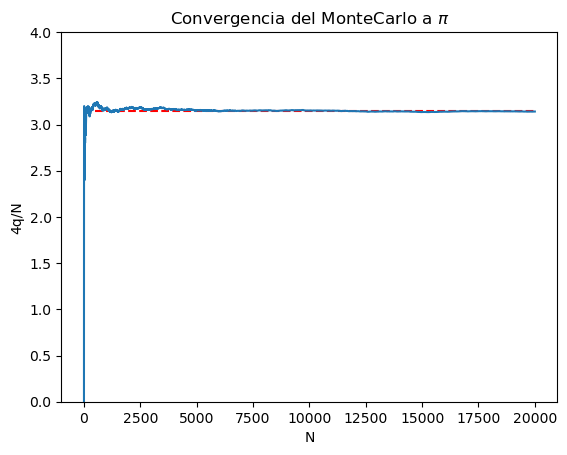

In [8]:
plt.hlines(3.14159265359, 0.0, N, linestyles='--', color='r')
plt.plot(N_list, pi_list)
plt.xlabel('N')
plt.ylabel('4q/N')
plt.ylim([0.0, 4.0])
plt.title(r'Convergencia del MonteCarlo a $\pi$')
plt.show()